<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/electron_optics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
Build intuition of around how the microscope works
* speed of electron
* wave function
* phase contrast imaging
* magnetic lenses



# Bibliography
* [NCCAT SPA short course 2020, Lecture 4: Algorithms and foundational math Part I & 2, Fred Sigworth](https://youtu.be/tzv5c5K7MEk)
  * See lecture notes under [Single Particle Short Course March 2-6, 2020. Day 3: Wednesday, March 4, 2020, 10:40 – 11:30 AM](https://nccat.nysbc.org/activities/courses/nccat-spa-short-course-2020/)
* Glaeser, R. (2007). Electron Crystallography of Biological Macromolecules. Oxford University Press.
  * Chapter 1. Introduction
  * Chapter 2. Structure Determination as it has been Developed Through X-ray Crystallography
  * Chapter 3. Fourier Optics and the Role of Diffraction in Image Formation
  * Chapter 4. Theoretical Fondations Specific to Electron Crystallography
* Thermo Fisher Scientific Brno s.r.o. (2016). How to make a microscope - FEI. [30 min youtube video](https://youtu.be/9W6J_f4yVVg)
* FEI. (2010). [Introduction to electron microscopy.](https://www.fei.com/WorkArea/DownloadAsset.aspx?id=15032385923)
* Reimer, L., & Kohl, H. (2008). Transmission Electron Microscopy Physics of Image Formation. Springer series in optical sciences (Vol. 51). http://doi.org/10.1007/978-0-387-34758-5

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Electron Beam (special relativity)
* The electron is very light and can be accellerated to 70% the speed of light in the high potentials in transmission electron microscopes (100 000 - 300 000 V)
* See p. 11 in FEI. (2010). [Introduction to electron microscopy.](https://www.fei.com/WorkArea/DownloadAsset.aspx?id=15032385923)
* The wavelength ($\lambda$) is related to Plank's constant ($h$) and the relativistic momentum of the electron ($p$) by
$$ \lambda = \frac{f}{p}$$
* Classical treatment
  * The electron is accellerated across a potential to gain energy $eV$, where $e$ is the electron's charge and $V$ is the extremely large potential of the microscope. This large potential is an engineering feat, and much care is taken to maintain it, and to maintain it at a near constant voltage.
  * After the electron has dropped through the potential, it has converted it to kinetic energy, so 
  $$eV = \frac{m_0v^2}{2} = \frac{p^2}{2m_0} \text{ ; $m_0$ rest mass of the electron}$$
  $$\implies p = \sqrt{2m_0eV}$$
  * Substituting for $p=m_0v$ in $\lambda=h/p$ gives
  $$\lambda = \frac{h}{p} = \frac{h}{vm_0} = \frac{h}{\sqrt{2m_0eV}}$$


Let's plot the speed as a function of voltage
$$v = \sqrt{2eV/m_0}$$
* $m_0 = 9.11*10^{−31}$ kg
* $e = 1.60*10^{-19}$ C

Text(0.5, 1.0, 'Classical treatment')

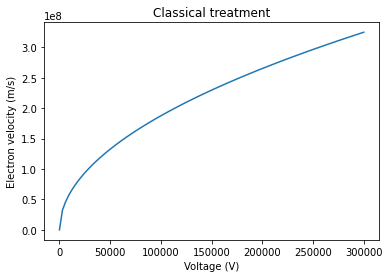

In [13]:
e=1.60217662e-19
m0=9.10938356e-31
V=np.linspace(0,300000,100)
v = np.sqrt(2*e*V/m0)
sr = pd.Series(v)
sr.index = V
ax = sr.plot()
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Electron velocity (m/s)')
ax.set_title('Classical treatment')

Here we see that the projected velocity reaches half the speed of light ($3*10^8$ m/s) at around 50 keV. In cryoEM we are using scopes at 120, 200, 300 keV! So we have to correct for relativisitic effects
$$\lambda = \frac{h}{\sqrt{2m_0eV(1+\frac{eV}{2m_0c^2})}}$$
* $h = 6.63 10^{-34}$ m$^2$kg/s



Text(0.5, 1.0, 'Relitivistic treatment')

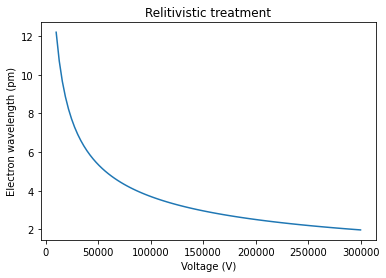

In [21]:
c=2.99792458e8
h=6.62607004e-34
V=np.linspace(10000,300000,100) # start at 10keV otherwise scale at low kev obscures interesting behaviour at high kev
Lambda = h/np.sqrt(2*m0*e*V*(1+e*V/(2*m0*c**2)))
sr = pd.Series(Lambda*10**12) # pm)
sr.index = V
ax = sr.plot()
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Electron wavelength (pm)')
ax.set_title('Relitivistic treatment')

We see that at 10s to 100s of keV, the electron is 10s to 1s of pm. There are 100 pm in 1 A, the characteristic length of atomic bond length in proteins (1-2 A), so we can use electrons to resolve features at these distances in principle.

Using the relativisitc equations in the table of Rimer (p. 19), we can calculate the veolcity, corrected for relativisitc effects
$$v = c\sqrt{(1 - \frac{1}{1+\frac{eV}{m_0c^2}})}$$

Note that this will be useful when seeing how many electrons are in the microscope.

Text(0.5, 1.0, 'Relativistic treatment')

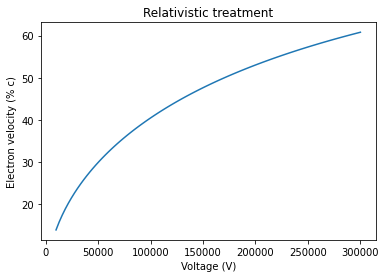

In [30]:
c=3e8

V=np.linspace(10000,300000,100)

v = c*np.sqrt(1-1/(1+e*V/(m0*c**2)))
sr = pd.Series(v/c*100)
sr.index = V
ax = sr.plot()
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Electron velocity (% c)')
ax.set_title('Relativistic treatment')

## How many electrons are in the column at once?
Since the electrons are going to fast, and the column is so small, we can calculate how long it takes for an electron to pass through the column (of length \~1 m). We see the electron move at the constant large (but relativistically corrected) velocities that range from \~20-60% c. The time is simply the column length (\~1 m) divided by the velocity.
$$t = d/v$$

Text(0.5, 1.0, 'Time for electron to pass through column')

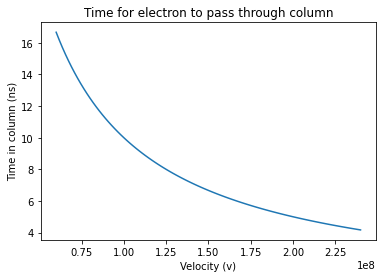

In [33]:
d=1
v = np.linspace(.2,.8,100)*c
t = d/v
sr = pd.Series(t*1e9)#ns
sr.index = v
ax = sr.plot()
ax.set_xlabel('Velocity (v)')
ax.set_ylabel('Time in column (ns)')
ax.set_title('Time for electron to pass through column')

We see that this takes the electron 4-16 ns to pass through the column.

If the electrons are passing through the column so quickly, how many are in the column at a time? 

We know the rate of electron emission from the current of the beam and the charge of the electron. 

Note that the current we are interested in is the dose, what the sample feels. The current after emission from the filament ([50 uA for a LaB6 and 10 uA for a cold FEG](https://www.azom.com/article.aspx?ArticleID=16146)) is blocked or filtered before interacting with the sample.

* r_e is the electron emission rate (# electrons emitted / s)
* $r_e=I/e$, where $I$ is the current




In [68]:
I = 1e-9
re = I/e

1.60217662e-10

The inverse of the emission rate is the time it takes in between electron detection events (on average). Note that there may be fluctuations in the emission rate, and we would have to have information on single detection events to calculate the variance. The emission current just averages very fast events together, but doens't tell us if there are fluctuations between these events.
* t = e/I

In [59]:
t = 10e-9 # 10 ns
I = e/t ; I*1e9 # nA

0.016021766200000002

So at about 0.02 nA there is a detection event every 10 ns. The ratio of this time to the time one electron spends in the column is the average number of electrons in the column.

Apparently there is supposed to be a long pause between when one single electron passes through the column and interacts with the sample. Cf. Grant Jensen's video on [Amplitude and Phase Contrast](https://youtu.be/gmZ-vzB5lyI?t=1653). Our above analysis depends very much on the column current, so the current in the column should be in the 10s of pA.

In cryo imaging the dose ranges 10-60 e/A2, which we can convert to a detection rate if we assume that the whole / majority of the beam is detected, and an imageing time (1 s)



In [64]:
doserate_e_A2_s = 30
image_length_A = 4000
e_rate = doserate_e_A2_s*image_length_A**2
1/e_rate

2.0833333333333334e-09

Here we see that there is a detection event every 2 ns